# Matplotlib

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
 
# 通过rcParams设置全局横纵轴字体大小
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24
 
np.random.seed(42)
 
# x轴的采样点
x = np.linspace(0, 5, 100)
 
# 通过下面曲线加上噪声生成数据，所以拟合模型就用y了……
y = 2*np.sin(x) + 0.3*x**2
y_data = y + np.random.normal(scale=0.3, size=100)
 
# figure()指定图表名称
fig = plt.figure('data')
fig1, axes1 = plt.subplots(nrows=1, ncols=2)
print(type(fig))
print(type(fig1))
print(type(axes1))
print(axes1)

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.figure.Figure'>
<type 'numpy.ndarray'>


注意，我们已经建立了一个图的对象，但是由于当前我们没有对该图进行任何操作，所以并不能显示任何内容。

matplot绘图主要的对象有**pyplot，figure，axes**三种对象。分别对应画布总体对象，画布和轴。

#### concept：
1.　Figure: Figure对象可以包含一个或者多个Axes

2.　Axes: 每个Axes对象都是一个拥有自己坐标系统的绘图区域

3.　Axis: Axis为坐标轴

4.　patches

![text](http://images.cnitblog.com/blog/413416/201301/28161628-cc13f9c508d44b59af00d482ccaeec95.png "示意图")

他们之间的关系是：
![text](http://images.cnitblog.com/blog/413416/201301/29220639-06b363b5f4e14b9585be1be494712f8c.png "示意图")



In [9]:
fig.plot(x,y_data)

AttributeError: 'Figure' object has no attribute 'plot'

In [10]:
axes1[0].plot(x,y_data)

这里要具体解释下报错的原因：上面说了 ***Figure*** 和　***Axes***　的关系。虽然 ***Figure***　代表了整个画布，但是只用 `plt.figure()`　也只是定义了一个画布，当前画布上并没有　**可绘图区域**————即　***Axes***，所以　***Figure***　并没有　***plot*** 对象。这时候，有两种选择，可以直接简单粗暴的使用：

In [ ]:
plt.plot(x,y_data)

这是　`plt`　对象的特别好用的一点，它会自动识别当前是否有　***Figure*** 和　***Axes***　对象。如果没有，则会适当的建立缺失的对象，进行画图。

另外也自己加上一个可画图区域————***Axes***，例如

In [ ]:
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

但是大多数情况下，为了方便，人们省略了这行代码。

除此之外，可以看到　`plt.subplot()` 可以同时帮我们建立　***Figure***　和　***Axes***　对象，因此也被广泛利用。

### 子图布局
有了这些概念，就很容易理解“图中图”是如何画出来的了：

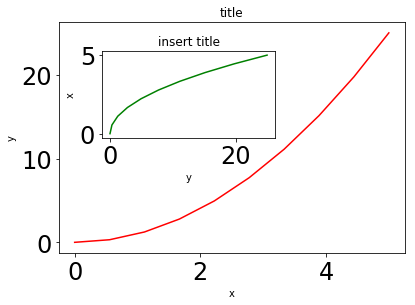

In [12]:
from pylab import *
x = linspace(0, 5, 10)
y = x ** 2

fig2 = plt.figure()

axes = fig2.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes2 = fig2.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

plt.show(fig2)

### 设置参数
很明显，那些该给整个图的参数就应该用　***Figure***　对象设置（如图的大小，图的分辨率，图的保存）；而那些针对某个画图区域的参数就应该用　***Axes*** 对象设置（如坐标轴，刻度，图的名字）。